##### Concept des API
Une **API (Application Programming Interface)** est une interface qui permet à des applications ou des services de communiquer entre eux. Dans le contexte de la science des données, les API sont souvent utilisées pour accéder à des données distantes sans avoir besoin de télécharger manuellement des fichiers.

**Comment ça marche ?** 

Requête **HTTP** : On envoie une requête à une API (généralement REST), en utilisant des méthodes comme :
1) **GET** pour récupérer des données.
2) **POST** pour envoyer des données (moins courant pour récupérer des données).
3) **Clé API** : Certaines API nécessitent une clé d’authentification pour limiter ou personnaliser l’accès. Cependant, il existe aussi des API publiques sans clé.

**Connexion à une API gratuite (Yahoo Finance via YFinance)**

Une méthode simple pour accéder aux données financières sans inscription consiste à utiliser une bibliothèque Python telle que yfinance.

https://pypi.org/project/yfinance/

In [23]:
### décommenter pour installer
# %pip install yfinance

In [24]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Télécharger les données financières de NVIDIA (NVDA) pour 2024
ystock_name = 'NVDA'
yf_df = yf.download(ystock_name, start='2024-01-01', end='2024-12-31')
yf_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.154346,49.281026,47.581511,49.230042,411254000
2024-01-03,47.555515,48.170339,47.306585,47.471539,320896000
2024-01-04,47.984398,48.486255,47.494535,47.753461,306535000
2024-01-05,49.083080,49.532953,48.292304,48.448262,415039000
2024-01-08,52.238186,52.260183,49.464974,49.497966,642510000
...,...,...,...,...,...
2024-12-23,139.669998,139.789993,135.119995,136.279999,176053500
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000


Utilisez toujours les fonctions intégrées pandas head(), tail(), describe() et info() pour obtenir une première vue de l'ensemble de données.

In [25]:
print(yf_df.head())

print()

print(yf_df.info())

print()

print(yf_df.describe())

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.154346  49.281026  47.581511  49.230042  411254000
2024-01-03  47.555515  48.170339  47.306585  47.471539  320896000
2024-01-04  47.984398  48.486255  47.494535  47.753461  306535000
2024-01-05  49.083080  49.532953  48.292304  48.448262  415039000
2024-01-08  52.238186  52.260183  49.464974  49.497966  642510000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   251 non-null    float64
 1   (High, NVDA)    251 non-null    float64
 2   (Low, NVDA)     251 non-null    float64
 3   (Open, NVDA)    251 non-null    float64
 4   (Volume, NVDA)  251 non-null    int64  
dtypes: float64(4), int64(1)
memo

Nous ajoutons deux nouvelles colonnes, l'une contenant la moyenne mobile sur 10 jours et l'autre le rendement quotidien, afin de les visualiser.

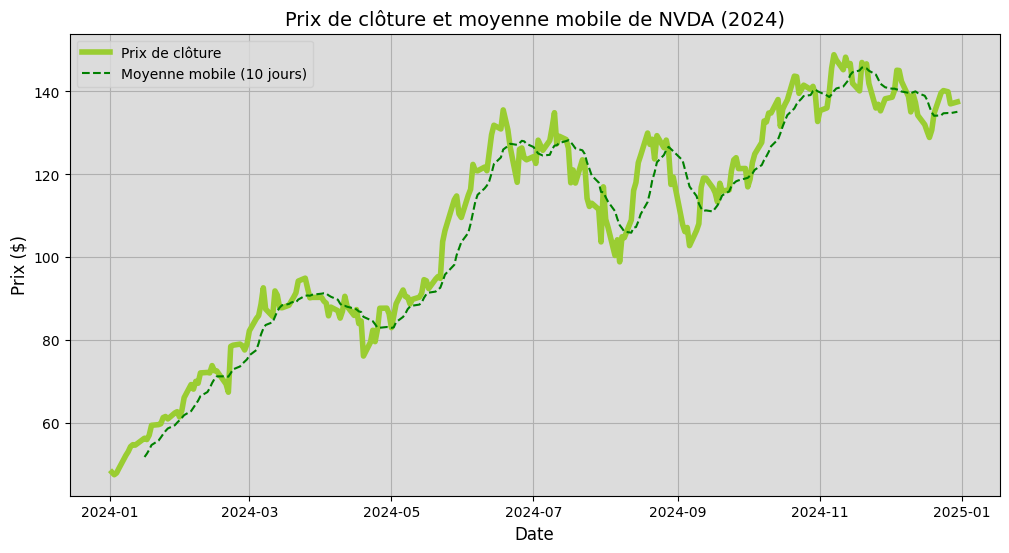

In [26]:
### Ajouter une colonne pour la moyenne mobile sur 10 jours
yf_df['Moving_Avg_10'] = yf_df['Close'].rolling(window=10).mean()

### Ajouter une colonne pour le retour journalier (% de variation entre deux jours consécutifs)
yf_df['Daily_Return'] = yf_df['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'gainsboro'
plt.plot(yf_df.index, yf_df['Close'], label='Prix de clôture', linewidth=4, color = 'yellowgreen')
plt.plot(yf_df.index, yf_df['Moving_Avg_10'], label='Moyenne mobile (10 jours)', linestyle='--', color = 'green')
plt.title('Prix de clôture et moyenne mobile de {} (2024)'.format(ystock_name), fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

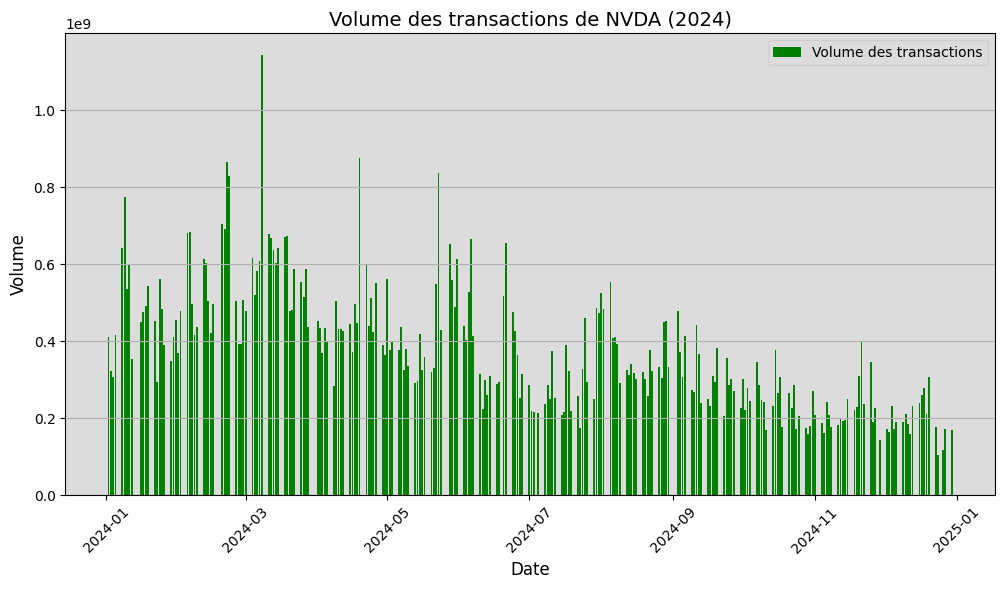

In [27]:
#### Visualisation 2 : Histogramme du volume des transactions
plt.figure(figsize=(12, 6))
plt.bar(yf_df.index, yf_df['Volume'].dropna().values.flatten(), color='green', label='Volume des transactions')
plt.title('Volume des transactions de {} (2024)'.format(ystock_name), fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**BDD**

Une base de données (BDD) est un système organisé qui permet de stocker, gérer et accéder à des données de manière structurée.
Nous pouvons facilement transformer un DataFrame Pandas en BDD.

In [30]:
df = pd.read_csv("./data/clothes_sales.csv")
df.head()

,Day,Type,Units Sold
0,Monday,Dress,1
1,Wednesday,Dress,37
2,Sunday,Dress,25
3,Thursday,Skirt,14
4,Sunday,Sweater,32


Ajouter les colonnes "Revenu" et "Profit"
Supposons que le fichier contient les colonnes quantité vendue et prix par unité, nous calculons :

Revenu = quantité vendue * prix par unité
Profit = revenu - coût total

In [33]:
price_per_item = 20
cost_per_item = 7
### Ajouter une colonne pour le revenue
df['Revenue'] = df['Units Sold'] * price_per_item

### Ajouter une colonne pour le profit
df['Profit'] = df['Revenue'] - (df['Units Sold'] * 7)

df.head()

,Day,Type,Units Sold,Revenue,Profit
0,Monday,Dress,1,20,13
1,Wednesday,Dress,37,740,481
2,Sunday,Dress,25,500,325
3,Thursday,Skirt,14,280,182
4,Sunday,Sweater,32,640,416


In [ ]:
### décommenter pour installer
# %pip install sqlite3

SQLite est un système de gestion de base de données relationnelle léger et intégré. Contrairement à d'autres systèmes comme MySQL ou PostgreSQL :

SQLite ne nécessite pas d'installation complexe ni de serveur : tout est contenu dans un simple fichier.
Il est rapide, facile à utiliser et parfait pour des projets locaux ou de petite envergure.
Il est compatible avec le langage SQL (Structured Query Language), utilisé pour manipuler les données.

In [35]:
import sqlite3

#### Créer une connexion à une base de données SQLite
#### SQLite est utilisé comme base de données relationnelle simple.
conn = sqlite3.connect("./data/sales_data.db")

#### La méthode to_sql permet d'insérer directement les données du DataFrame dans une table.
df.to_sql('clothes_sales', conn, if_exists='replace', index=False)

print("Base de données créée avec succès !")

Base de données créée avec succès !


Pour valider que les données ont été insérées correctement dans la BDD : (sql queries)


In [37]:
#### Lire les données depuis la base de données
query = "SELECT * FROM clothes_sales LIMIT 5;"
result = pd.read_sql(query, conn)

print(result)

##### Afficher les données avec un revenu supérieur à 10,000 :
query = "SELECT * FROM clothes_sales WHERE Revenue > 10000;"
result = pd.read_sql(query, conn)
print(result)

         Day     Type  Units Sold  Revenue  Profit
0     Monday    Dress           1       20      13
1  Wednesday    Dress          37      740     481
2     Sunday    Dress          25      500     325
3   Thursday    Skirt          14      280     182
4     Sunday  Sweater          32      640     416


Fermer la connexion à le BDD

In [ ]:
conn.close()